# Regressão 01 - tarefa 03 - transformações em X e Y

In [4]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip']/tips['net_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,0.108899


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [6]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)
X
modelo = sm.OLS(y,X).fit()
modelo.summary()

# Segundo o que foi aprendido, as variáveis que passuem um P>|t| maior que .01 são as que podemos classificar como não significativas.
# portanto, podemos desconsiderar no modelo as variáveis: sex, smoker e time. Deixando portanto o nosso modelo da seguinte maneira:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.64e-20
Time:                        10:59:29   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        11:02:00   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

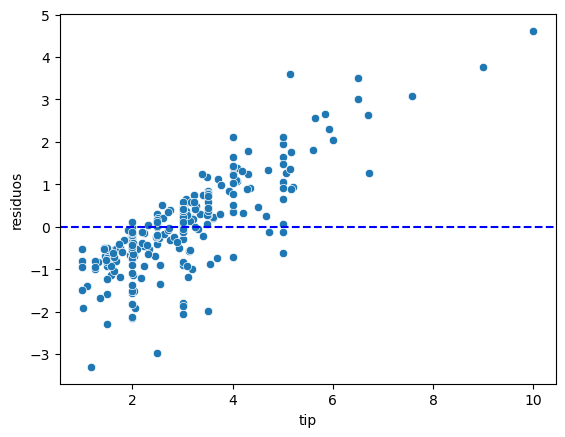

In [19]:
y, X = patsy.dmatrices('tip ~ net_bill', data=tips)
X
modelo_limpo = sm.OLS(y,X).fit()


# vamos plottar o gráfico de resíduos:

tips['residuos'] = modelo_limpo.resid
sns.scatterplot(x = 'tip', y = 'residuos', data = tips)
plt.axhline(y=0, color = 'b', linestyle = '--')

# Foi requisitado também que verifiquemos qual é melhor para prever o modelo, se net_bill ou log(net_bill). Plotemos o modelo com log de net_bill para 
# verificar:

# O gráfico apresenta resíduos crescentes, o que claramente demonstra que o modelo pode ser melhorado. No entanto, este padrão de crescimento linear
# dos resíduos, é um padrão que não consigo supor imediatamente um tipo de g(x) para controlar
modelo_limpo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           4.40e-20
Time:                        11:05:03   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

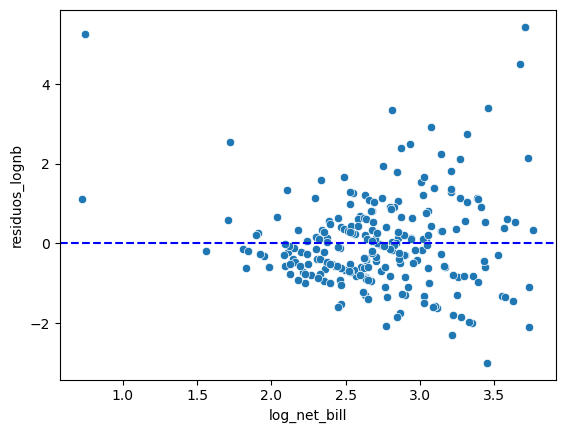

In [26]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', data=tips)
X
modelo_log = sm.OLS(y,X).fit()
tips['residuos_lognb'] = modelo_log.resid
tips['log_net_bill'] = tips['net_bill'].apply(np.log)

sns.scatterplot(x='log_net_bill', y='residuos_lognb', data=tips)
plt.axhline(y=0, color = 'b', linestyle = '--')

modelo_log.summary()

O resultado foi interessante, acima. Obtivemos um melhor resultado, porém os resíduos aumentam em módulo conforme aumenta nossa variável investigativa...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           4.96e-22
Time:                        11:15:02   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

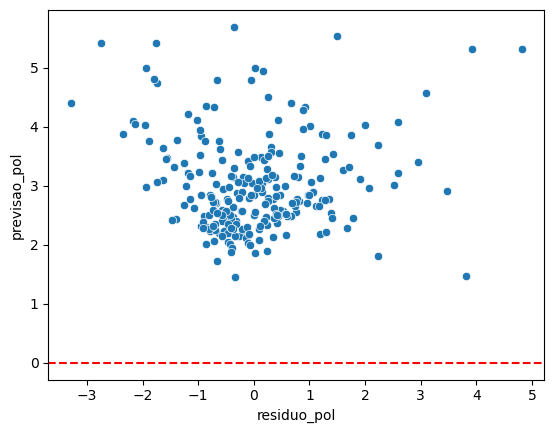

In [38]:
y, X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill, 2)', data=tips)
X
modelo_polinomio = sm.OLS(y,X).fit()
tips['residuo_pol'] = modelo_polinomio.resid
tips['previsao_pol'] = modelo.fittedvalues


sns.scatterplot(x='residuo_pol', y='previsao_pol', data=tips)
plt.axhline(y=0, linestyle='--', color='r')

modelo_polinomio.summary()

#O nosso erro, agora, é sempre estimarmos um valor abaixo do que realmente foi apresentado, e portanto, precisando de um epson positivo
#para atingirmos o valor verdadeiro. No entanto, o nosso R² diz que, com este modelo, estamos prevendo uma quantidade maior da nossa
#variação...

Dentre os modelos trabalhados, o que apresentou melhor resultado foi o modelo inicial, que utilizava as várias variáveis. No entanto, como já fomos insrtruídos, o R-quadrado não deve ser a única métrica para avaliação, e o valor do 	P>|t|	 provavelmente indica que na verdade trata-se de um overfitting no nosso modelo de regressão este aumento artificial do R-quadrado quando incluímos várias variáveis.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [44]:
# Ponderando uma dúvida inicial, já adiciono que não entendi porque o título trata de modelo do valor percentual, e o enunciado trata do
#log. farei a atividade conforme o enunciado...

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data = tips)
X
m2 = sm.OLS(y, X).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.21e-18
Time:                        11:47:36   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O nosso R-quadrado no primeiro modelo, com todas as variáveis foi .313

In [46]:
# Removendo as variáveis insignificantes: 
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', data = tips)
X
m2_limpo = sm.OLS(y, X).fit()

tips['predito_m2_limpo'] = np.exp(m2_limpo.fittedvalues)
tips['m2_limpo_resid'] = tips['tip'] - tips['predito_m2_limpo']
R_squaredm2_limpo = tips[['tip','predito_m2_limpo']].corr().iloc[0, 1]**2
print(R_squaredm2_limpo)

0.31564473511944907


O nosso R-quadrado aqui já melhorou um pouco, para .315! O que demonstra que estamos sendo mais capazes de prever a variação... vamos, agora, verificar os resíduos se já estão apropriados...

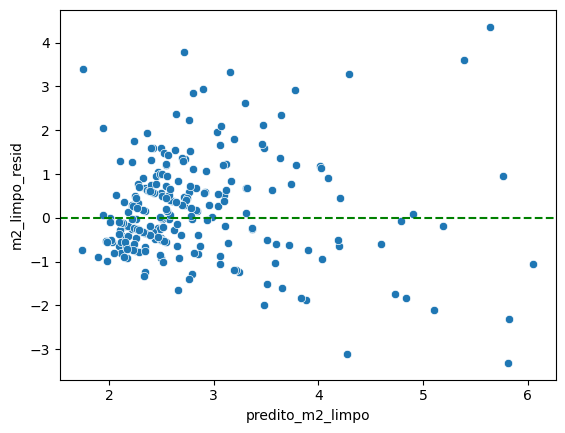

In [58]:
sns.scatterplot(x='predito_m2_limpo', y='m2_limpo_resid', data=tips)
plt.axhline(y=0, linestyle='--', color='g')

In [ ]:
Temos ainda um pequeno problema de o módulo dos resíduos aumentar com o tempo... no entanto, bastante atenuado já...

In [52]:
# Com o log de net_bill

y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', data = tips)
X
m2_log = sm.OLS(y, X).fit()
m2_log.summary()

tips['pred_m2_doublelog'] = np.exp(m2_log.fittedvalues)
tips['resid_m2_doublelog'] = tips['tip'] - tips['pred_m2_doublelog']
# Aqui, transformamos net_bill em seu logaritmo, para tentar explicar melhor os dados. Obtivemos um R-squared melhor! Vamos averiguar o
# grafico dos residuos...

0.3283774385527559


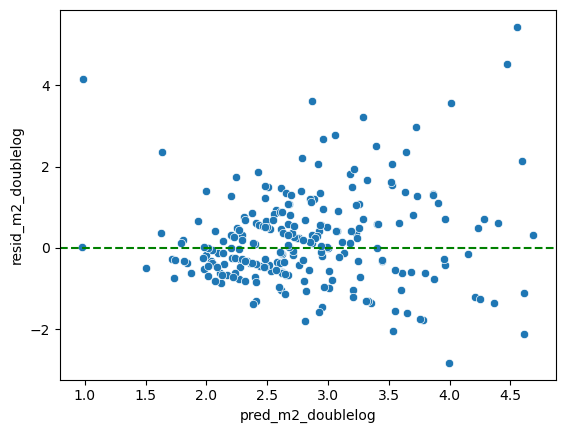

In [64]:
sns.scatterplot(x='pred_m2_doublelog', y='resid_m2_doublelog', data=tips)
plt.axhline(y=0, linestyle='--', color='g')

R_squared_m2doublelog = tips[['tip', 'pred_m2_doublelog']].corr().iloc[0,1]**2
print(R_squared_m2doublelog)

In [70]:
# Com um polinômio (???) de net_bill. Deixei esse ícone de dúvida pois o enunciado não deixa claro qual deve ser o grau do polinômio...
# como até o momento só lidamos com polinômios do segundo grau, usarei do segundo grau... mas polinômio é BEM mais amplo que isso... lol

y, X = patsy.dmatrices('np.log(tip) ~ net_bill + np.power(net_bill, 2)', data = tips)
X
m2_pol2 = sm.OLS(y, X).fit()

tips['pred_m2_pol2'] = np.exp(m2_pol2.fittedvalues)
tips['m2_pol2_resid'] = tips['tip'] - tips['pred_m2_pol2']

corr_m2_pol2 = tips[['pred_m2_pol2', 'tip']].corr().iloc[0, 1]**2
print(corr_m2_pol2)

# A melhor explicação dos dados parece ter sido dada pelo polinômio de grau 2...

0.32908491114682054


A nossa precisão aumentou um pouco! Este é, até agora, o melhor modelo de prever a gorjeta que fomos capazes de criar.

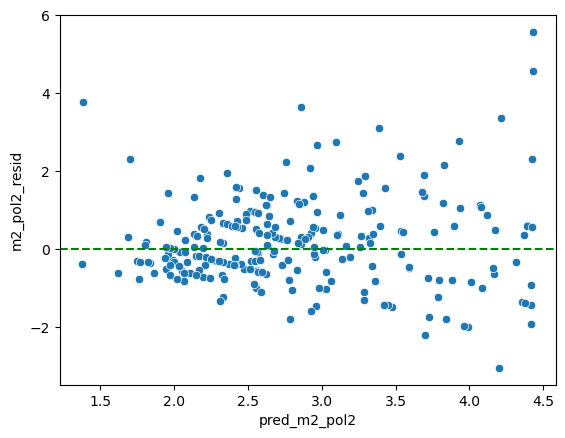

In [72]:
sns.scatterplot(x='pred_m2_pol2', y='m2_pol2_resid', data=tips)
plt.axhline(y=0, linestyle = '--', color='g')

O gráfico de residuos ainda denota um aumento do módulo do erro com o passar do tempo. No entanto, este problema foi atenuado.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:42:45   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

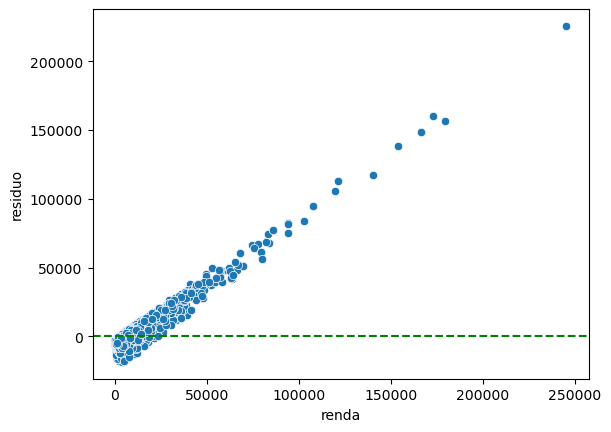

In [92]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao = previsao.dropna()
print(previsao.columns)
regr1 = smf.ols('renda ~ tempo_emprego', data=previsao).fit()
previsao['residuo'] = regr1.resid
sns.scatterplot(x = 'renda', y = 'residuo', data = previsao)
plt.axhline(y = 0, linestyle = '--', c = 'g')

regr1.summary()

Com tudo que estudamos até aqui, esse aumento do erro com o passar do tempo, sugere que a melhor transformação para fazermos é uma transformação logaritmica...

Vamos testar, então, fazermos uma transformação logaritmica em renda, e vermos o se nossos resultados melhoram...

In [98]:
regr1_ajuste = smf.ols('np.log(renda) ~ tempo_emprego', data=previsao).fit()
previsao['regr1_ajuste_predito'] = np.exp(regr1_ajuste.fittedvalues)
previsao['regr1_ajuste_residuo'] = previsao['renda'] - previsao['regr1_ajuste_predito']
R_squared_regr1_ajuste = previsao[['regr1_ajuste_predito', 'renda']].corr().iloc[0, 1]**2
print(R_squared_regr1_ajuste)

0.14818510837938106


O nosso R-quadrado, infelizmente, não reagiu significantemente à transformação... :( vamos tentar incluir mais variáveis na análise e ver quais serão nossos resultados...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:47:12   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

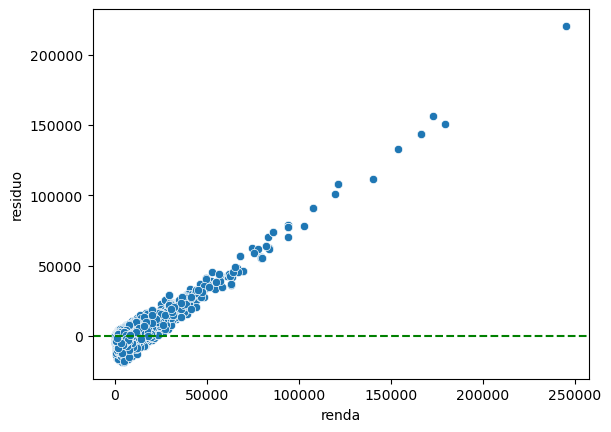

In [101]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao = previsao.dropna()
regr = smf.ols("""renda ~ tempo_emprego + posse_de_veiculo + posse_de_imovel + sexo + qtd_filhos + tipo_renda + educacao + estado_civil
               + tipo_residencia + idade + qt_pessoas_residencia""", data=previsao).fit()
previsao['residuo'] = regr.resid
sns.scatterplot(x = 'renda', y = 'residuo', data = previsao)
plt.axhline(y = 0, linestyle = '--', c = 'g')
regr.summary()

No nosso sumário, identificamos que várias das variáveis não são pertinentes para a nossa análise, dado o comprimento do p>|t|. Os valores considerados pertinentes foram. tomando alfa = .01:
sexo
tipo_renda empresario
tempo_emprego
idade

vamos então fazer um novo modelo de regressão múltipla que use apenas estas variáveis...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     602.8
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:47:19   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2298.0529    329.338     -6.978      0.000   -2943.606   -1652.500
sexo[T.M]                       6079.7481    145.768     41.708      0.000    5794.020    6365.476
tipo_renda[T.Bolsista]          -781.1597   2563.862     -0.305      0.761   -5806.726    4244.407
tipo_renda[T.Empresário]         857.1736    157.534      5.441      0.000     548.382    1165.966
tipo_renda[T.Pensionista]      -2646.5373   2562.850     -1.033      0.302   -7670.120    2377.046
tipo_renda[T.Servidor público]   244.4975    234.975      1.041      0.298    -216.090     705.085
tempo_emprego                    554.2941     11.018     50.308      0.000     532.697     575.891
idade                             40.6952      7.806      5.213      0.000      25.393      55.997
==============================================================================
Omnibus:                    17531.813   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9745386.949
Skew:                           8.095   Prob(JB):                         0.00
Kurtosis:                     139.231   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

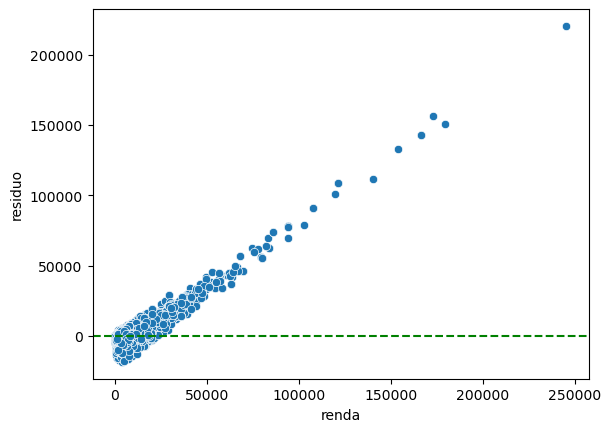

In [103]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao = previsao.dropna()
regr_m = smf.ols('renda ~ tempo_emprego + sexo + tipo_renda + idade', data=previsao).fit()
previsao['residuo'] = regr_m.resid
sns.scatterplot(x = 'renda', y = 'residuo', data = previsao)
plt.axhline(y = 0, linestyle = '--', c = 'g')
regr_m.summary()

# Os nossos resíduos continuam sendo extremamente problemáticos... este padrão de resíduo está totalmente fora do comum, apresentando 
# padrão claríssimo de crescimento do valor do erro, que começa errando as predições para cima (necessitando de um epson negativo para
# compensar) e termina errando as predições para baixo (necessitando de um epson positivo para compensar)

Vamos então, tentar fazer uma transformação logaritmica em renda, dessa vez com outras variaveis inclusas, que possam ajudar a explicar a nossa variação...

A correlação do modelo com transformação logaritimica em renda é 0.3641703861840953


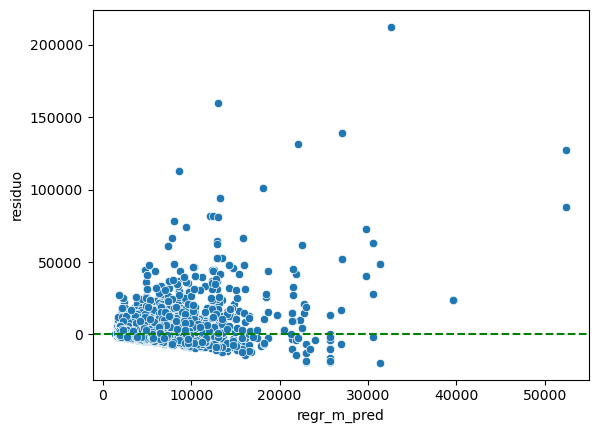

In [106]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao = previsao.dropna()
regr_m = smf.ols('np.log(renda) ~ tempo_emprego + sexo + tipo_renda + idade', data=previsao).fit()
previsao['regr_m_pred'] = np.exp(regr_m.fittedvalues)
previsao['residuo'] = previsao['renda'] - previsao['regr_m_pred']
sns.scatterplot(x = 'regr_m_pred', y = 'residuo', data = previsao)
plt.axhline(y = 0, linestyle = '--', c = 'g')

regr_m_Rsquared = previsao[['renda', 'regr_m_pred']].corr().iloc[0, 1]**2
print(f'A correlação do modelo com transformação logaritimica em renda é {regr_m_Rsquared}')

Grandioso! Nosso Rsquared aumentou imensamente, denotando um aprimoramento EXPRESSIVO da nossa capacidade de prever a renda baseado nas variáveis explicativas...! Devido à natureza naturalmente imprevisivel da renda, e o fato de que existem muitos fatores intra-pessoais que influenciam diretamente a renda e não possuímos meio nem de aferi-los, e nem muito menos estao listados no nosso banco de dados, receio que seja particularmente difícil aumentar ainda mais o nosso R-quadrado. Vamos, no entanto, valiar os resíduos com relação à cada uma das explicativas, para averiguar se não há nada que possamos fazer para melhorar nem que seja um único valioso .01 em nosso R-squared...

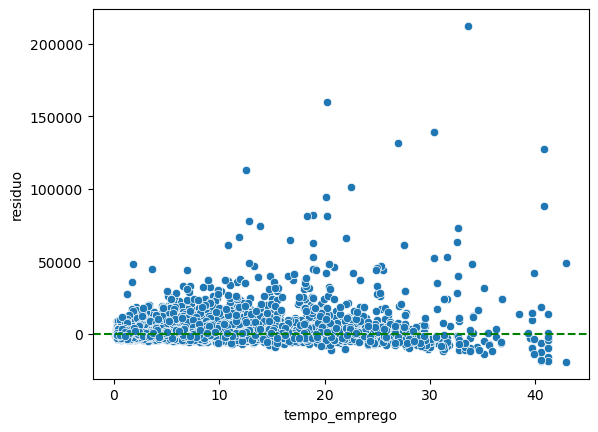

In [109]:
# Explicativas: tempo_emprego + sexo + tipo_renda + idade

#Residuo com relação à tempo de emprego
sns.scatterplot(x = 'tempo_emprego', y = 'residuo', data = previsao)
plt.axhline(y = 0, linestyle = '--', c = 'g')

O que podemos detectar no nosso resíduo acima, é apenas o fato de que existem muitos "outliers" no nosso gráfico... se considerarmos apenas a grandiosa maioria dos nossos dados, os nossos erros são razoáveis... e considerando que a natureza do tempo de emprego X renda é volátil devido à diferença de setor de emprego, por exemplo, temo que este seja um resultado que não seremos capazes de melhorar este resultado usando apenas transformações matemáticas na variável. O que poderia melhorar, certamente, este resultado, seria usarmos uma árvore, que leva em consideração também o tipo da ocupação vs tempo de emprego, e isto seria muito provavelmente capaz de prever muito melhor a renda do empregado, em vez de só o tempo de emprego. Mas as ferramentas para fazer isso ainda não nos foram apresentadas... (Exceto usar uma árvore de regressão... mas não é nosso intuito aqui, nesta disciplina...)

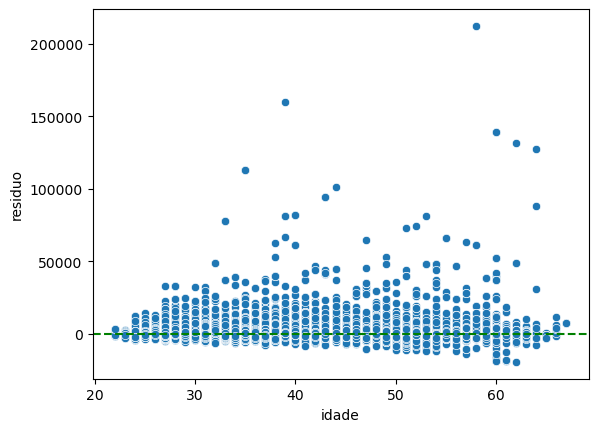

In [112]:
#Residuo com relação à idade
sns.scatterplot(x = 'idade', y = 'residuo', data = previsao)
plt.axhline(y = 0, linestyle = '--', c = 'g')

Novamente, temos bastantes outliers. Semelhantemente ao caso anterior, somente a idade não é um bom indicativo de renda, vários outros fatores teriam que ser considerados em conjunto para que a idade pudesse ser um fator de capacidade de predição excelente, como tipo de formação, por exemplo... então, não será a aplicação de nenhuma g(x) na nossa explicativa que irá eliminar estes outliers... Uma coisa que me vem a mente que poderiamos fazer para melhorar a capacidade preditiva, seria normatizar valores que estivessem muito distante da média para que se concentrassem mais em torno dela... mas não foi apresentado no curso um meio eficiente de fazê-lo, então suponho que não será possível...

<Axes: ylabel='residuo'>

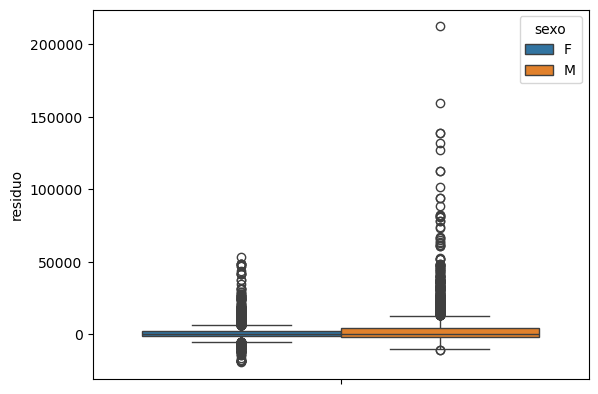

In [117]:
# Vamos verificar o resíduo com relação ao gênero: 

sns.boxplot(y='residuo', hue='sexo', data=previsao)

Vemos aqui uma diferença significativa com relação aos outliers. O nosso algoritmo parece ser capaz de prever com mais efetividade, e menos erros significativos, a renda que uma mulher recebe, do que a que um homem recebe. Para fazer um tratamento adequado, suponho que seria necessário ter uma hipótese aceitável do motivo, para decidir o que fazer. Não me vem nada à cabeça, então, não vejo como podemos tratar. Não acho que uma transformação matemática possa resolver esse problema... Além do mais, fazer qualquer hipótese sem embasamento sobre diferenças entre variãncia da renda com relação à gênero, pode ser extremamente polêmico...


Vamos verificar o resíduo com relação ao tipo de renda: 

<Axes: ylabel='residuo'>

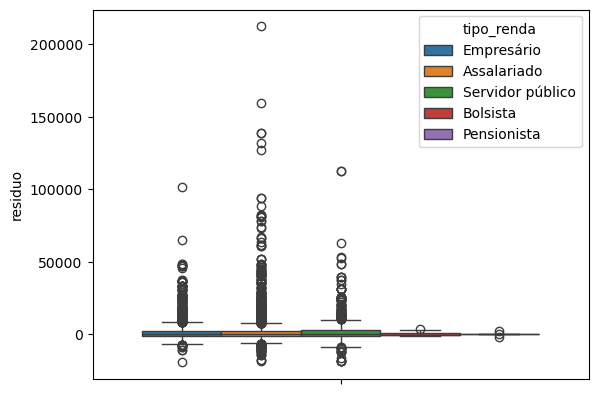

In [125]:
# Vamos verificar o resíduo com relação ao gênero: 

sns.boxplot(y='residuo', hue='tipo_renda', data=previsao)

Aqui, suponho que nada estranho esteja acontecendo. Apenas o tipo de renda, naturalmente, gera uma instabilidade muito grande com relação à renda esperada... um funcionário público pode ser um professor ou um juiz, um assalariado pode ser um estagiário ou um gerente, etc. E, como esperado, a presença de outliers nas categorias pensionista e bolsista são raros... Nada que eu consiga detectar que pudéssemos tratar meramente com a aplicação de uma função de x...